In [38]:
import numpy as np
import pandas as pd

In [39]:
import nltk

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanskritia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sanskritia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sanskritia/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [44]:
df = pd.read_csv("Data/Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [46]:
df = df[['Text', 'Score']]
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [47]:
df.isnull().sum()

Text     0
Score    0
dtype: int64

In [48]:
df.dropna(inplace=True)

In [49]:
df.isnull().sum()

Text     0
Score    0
dtype: int64

In [50]:
def map_sentiment(score):
    if score <= 2:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

In [51]:
df["Sentiment"] = df["Score"].apply(map_sentiment)

In [52]:
df.head()

,Text,Score,Sentiment
0,I have bought several of the Vitality canned d...,5,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,1,Negative
2,This is a confection that has been around a fe...,4,Positive
3,If you are looking for the secret ingredient i...,2,Negative
4,Great taffy at a great price. There was a wid...,5,Positive


In [53]:
df["Sentiment"].value_counts()

Sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64

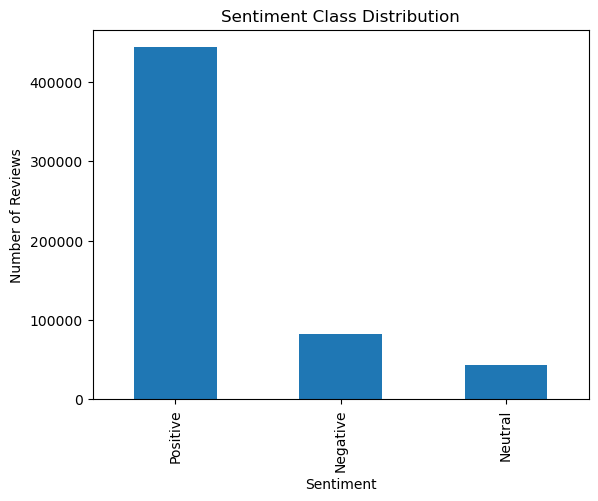

In [54]:
import matplotlib.pyplot as plt

df["Sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

In [73]:
import re

In [75]:
def clean_text_basic(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [77]:
sample_text = df["Text"].iloc[0]
print("Original text:\n", sample_text)

print("\nCleaned text:\n", clean_text_basic(sample_text))

Original text:
 I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

Cleaned text:
 i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most


In [79]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words("english"))

In [81]:
def clean_text_with_stopwords(text):
    # Basic cleaning
    text = clean_text_basic(text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    return " ".join(tokens)

In [85]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sanskritia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sanskritia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [87]:
print("After basic cleaning:\n", clean_text_basic(sample_text))
print("\nAfter stopword removal:\n", clean_text_with_stopwords(sample_text))

After basic cleaning:
 i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most

After stopword removal:
 bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better


In [89]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [91]:
def clean_text_final(text):
    # Basic cleaning
    text = clean_text_basic(text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words
    ]
    
    return " ".join(tokens)

In [93]:
print("After stopword removal:\n", clean_text_with_stopwords(sample_text))
print("\nAfter lemmatization:\n", clean_text_final(sample_text))

After stopword removal:
 bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better

After lemmatization:
 bought several vitality canned dog food product found good quality product look like stew processed meat smell better labrador finicky appreciates product better


In [97]:
df["Cleaned_Text"] = df["Text"].apply(clean_text_final)
df.head()

,Text,Score,Sentiment,Cleaned_Text
0,I have bought several of the Vitality canned d...,5,Positive,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,1,Negative,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,4,Positive,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,2,Negative,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,5,Positive,great taffy great price wide assortment yummy ...


In [99]:
tfidf = TfidfVectorizer(max_features=5000)

In [101]:
X = tfidf.fit_transform(df["Cleaned_Text"])
y = df["Sentiment"]

In [103]:
X.shape

(568454, 5000)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [107]:
X_train.shape, X_test.shape

((454763, 5000), (113691, 5000))

In [109]:
nb_model = MultinomialNB()

In [111]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [113]:
y_pred_nb = nb_model.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.814277295476335

Classification Report:

              precision    recall  f1-score   support

    Negative       0.83      0.26      0.39     16407
     Neutral       0.55      0.00      0.01      8528
    Positive       0.81      1.00      0.90     88756

    accuracy                           0.81    113691
   macro avg       0.73      0.42      0.43    113691
weighted avg       0.80      0.81      0.76    113691

